# Generate FWE Corrected R-Squared Map 
- Using maximum statistic correction
- Notes on controlling a regression:
    - Adding covariates to a regression will 'control' for them, but will almost always increase the R-squared. 
    - To 'remove' a covariate from the regression, you will want to regress a nuisance covariate OUT of the covariate of interest. 
        - This means your regressor will become the residuals from the regression of cov_1 ~ nuisance_cov1

Import Niftis
- These are EXPECTED to have subject IDs which are IDENTICAL to the subject IDs that go in the covarite DF column names below
- Column labels are subject IDs. 
- This is expected to ultimately have the form:

|        |  1 |  2 |  3 |  4 |  5 |  6 |  7 |  8 |  9 |  10 | ... |  40 |  41 |  42 |  43 |  45 |  46 |  47 |  48 |  49 |  50 |
|----------|------------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|------------|-----|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|
| Voxel 1     | 3          | 4         | 7         | 2         | 2         | 2         | 9         | 4         | 7         | 5          | ... | 5           | 2           | 7           | 7           | 3           | 8           | 8           | 1           | 1           | 3           |
| . . .      | ...         | ...        | ...         | ...         | ...         | ...         | ...         | ...         | ...         | ...          | ... | ...           | ...           | ...           | ...           | ...           | ...           | 7           | ...           | ...           | ...           |
| Voxel N     | 2          | 1         | 0         | 1         | 3         | 4         | 9         | 5         | 8         | 6          | ... | 6           | 3           | 8           | 8           | 4           | 9           | 9           | 2           | 2           | 4           |

In [1]:
import_path ='/Volumes/OneTouch/datasets/Queensland_PD_DBS_STN/BIDSdata/derivatives/leaddbs'
file_target = 'sub-*/stimulations/MNI152NLin2009bAsym/gs_20200826142724/GSP 1000 (Yeo 2011)_Full Set (Yeo 2011)/vat_seed_compound_fMRI_func_seed_T.nii'

In [2]:
from calvin_utils.file_utils.import_functions import GiiNiiFileImport
giinii = GiiNiiFileImport(import_path=import_path, file_column=None, file_pattern=file_target, subject_pattern='sub-')
nimg_df = giinii.run()
nimg_df

Attempting to import from: /Volumes/OneTouch/datasets/Queensland_PD_DBS_STN/BIDSdata/derivatives/leaddbs/sub-*/stimulations/MNI152NLin2009bAsym/gs_20200826142724/GSP 1000 (Yeo 2011)_Full Set (Yeo 2011)/vat_seed_compound_fMRI_func_seed_T.nii


,sub-LeadDBS034/stimulations/MNI152NLin2009bAsym/gs_20200826142724/GSP 1000 (Yeo 2011)_Full Set (Yeo 2011)/vat_seed_compound_fMRI_func_seed_T.nii,sub-LeadDBS060/stimulations/MNI152NLin2009bAsym/gs_20200826142724/GSP 1000 (Yeo 2011)_Full Set (Yeo 2011)/vat_seed_compound_fMRI_func_seed_T.nii,sub-LeadDBS058/stimulations/MNI152NLin2009bAsym/gs_20200826142724/GSP 1000 (Yeo 2011)_Full Set (Yeo 2011)/vat_seed_compound_fMRI_func_seed_T.nii,sub-LeadDBS067/stimulations/MNI152NLin2009bAsym/gs_20200826142724/GSP 1000 (Yeo 2011)_Full Set (Yeo 2011)/vat_seed_compound_fMRI_func_seed_T.nii,sub-LeadDBS051/stimulations/MNI152NLin2009bAsym/gs_20200826142724/GSP 1000 (Yeo 2011)_Full Set (Yeo 2011)/vat_seed_compound_fMRI_func_seed_T.nii,sub-LeadDBS069/stimulations/MNI152NLin2009bAsym/gs_20200826142724/GSP 1000 (Yeo 2011)_Full Set (Yeo 2011)/vat_seed_compound_fMRI_func_seed_T.nii,sub-LeadDBS056/stimulations/MNI152NLin2009bAsym/gs_20200826142724/GSP 1000 (Yeo 2011)_Full Set (Yeo 2011)/vat_seed_compound_fMRI_func_seed_T.nii,sub-LeadDBS035/stimulations/MNI152NLin2009bAsym/gs_20200826142724/GSP 1000 (Yeo 2011)_Full Set (Yeo 2011)/vat_seed_compound_fMRI_func_seed_T.nii,sub-LeadDBS068/stimulations/MNI152NLin2009bAsym/gs_20200826142724/GSP 1000 (Yeo 2011)_Full Set (Yeo 2011)/vat_seed_compound_fMRI_func_seed_T.nii,sub-LeadDBS057/stimulations/MNI152NLin2009bAsym/gs_20200826142724/GSP 1000 (Yeo 2011)_Full Set (Yeo 2011)/vat_seed_compound_fMRI_func_seed_T.nii,...,sub-LeadDBS085/stimulations/MNI152NLin2009bAsym/gs_20200826142724/GSP 1000 (Yeo 2011)_Full Set (Yeo 2011)/vat_seed_compound_fMRI_func_seed_T.nii,sub-LeadDBS071/stimulations/MNI152NLin2009bAsym/gs_20200826142724/GSP 1000 (Yeo 2011)_Full Set (Yeo 2011)/vat_seed_compound_fMRI_func_seed_T.nii,sub-LeadDBS070/stimulations/MNI152NLin2009bAsym/gs_20200826142724/GSP 1000 (Yeo 2011)_Full Set (Yeo 2011)/vat_seed_compound_fMRI_func_seed_T.nii,sub-LeadDBS084/stimulations/MNI152NLin2009bAsym/gs_20200826142724/GSP 1000 (Yeo 2011)_Full Set (Yeo 2011)/vat_seed_compound_fMRI_func_seed_T.nii,sub-LeadDBS083/stimulations/MNI152NLin2009bAsym/gs_20200826142724/GSP 1000 (Yeo 2011)_Full Set (Yeo 2011)/vat_seed_compound_fMRI_func_seed_T.nii,sub-LeadDBS077/stimulations/MNI152NLin2009bAsym/gs_20200826142724/GSP 1000 (Yeo 2011)_Full Set (Yeo 2011)/vat_seed_compound_fMRI_func_seed_T.nii,sub-LeadDBS048/stimulations/MNI152NLin2009bAsym/gs_20200826142724/GSP 1000 (Yeo 2011)_Full Set (Yeo 2011)/vat_seed_compound_fMRI_func_seed_T.nii,sub-LeadDBS041/stimulations/MNI152NLin2009bAsym/gs_20200826142724/GSP 1000 (Yeo 2011)_Full Set (Yeo 2011)/vat_seed_compound_fMRI_func_seed_T.nii,sub-LeadDBS046/stimulations/MNI152NLin2009bAsym/gs_20200826142724/GSP 1000 (Yeo 2011)_Full Set (Yeo 2011)/vat_seed_compound_fMRI_func_seed_T.nii,sub-LeadDBS079/stimulations/MNI152NLin2009bAsym/gs_20200826142724/GSP 1000 (Yeo 2011)_Full Set (Yeo 2011)/vat_seed_compound_fMRI_func_seed_T.nii
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902624,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Fix names

In [3]:
pre = 'sub-LeadDBS'
post = '/stim'

In [4]:
nimg_df = GiiNiiFileImport.splice_colnames(nimg_df, pre, post)
nimg_df

,034,060,058,067,051,069,056,035,068,057,...,085,071,070,084,083,077,048,041,046,079
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902624,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Import Covariates

**The CSV is expected to be in this format**
- sub column contents MUST match the names of the neuroimaging files above. 
    - ID column 
```
+-----+----------------------------+--------------+--------------+--------------+
| sub | Nifti_File_Path            | Covariate_1  | Covariate_2  | Covariate_3  |
+-----+----------------------------+--------------+--------------+--------------+
| 1   | /path/to/file1.nii.gz      | 0.5          | 1.2          | 3.4          |
| 2   | /path/to/file2.nii.gz      | 0.7          | 1.4          | 3.1          |
| 3   | /path/to/file3.nii.gz      | 0.6          | 1.5          | 3.5          |
| 4   | /path/to/file4.nii.gz      | 0.9          | 1.1          | 3.2          |
| ... | ...                        | ...          | ...          | ...          |
+-----+----------------------------+--------------+--------------+--------------+
```

In [5]:
# Specify the path to your CSV file containing NIFTI paths
input_csv_path = '/Volumes/OneTouch/datasets/Queensland_PD_DBS_STN/Clinical/queensland_cognition.csv'
sheet= None #'master_list_proper_subjects'

In [6]:
# Specify where you want to save your results to
out_dir = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/collaborations/fox_fluency/queensland/elf_fluency_task'

In [7]:
from calvin_utils.permutation_analysis_utils.statsmodels_palm import CalvinStatsmodelsPalm
# Instantiate the PalmPrepararation class
cal_palm = CalvinStatsmodelsPalm(input_csv_path=input_csv_path, output_dir=out_dir, sheet=sheet)
# Call the process_nifti_paths method
data_df = cal_palm.read_and_display_data()
data_df

,Subject,age_at_surgery,Subiculum_T_Connectivity,Z_Scored_Subiculum_T_Connectivity,Subiculum_R_Connectivity,Subiculum_RFz_Connectivity,Pre_MMSE_Total,FU4_MMSE_Total,Percent_Cognitive_Improvement_MMSE_Total,Z_Scored_Percent_Cognitive_Improvement_MMSE,FU4_MMSE_Total_1,Pre_MOCA_Total,FU4_MOCA_Total,FU4_MOCA_Recall,Pre_MOCA_Recall,MOCA_Recall_change_PreToFU4_Percent_Decline,ELF_TotalCorrect_change_PreToFU4_abs
0,29.0,71.0,20.5,-0.900,0.122,0.123,28.0,26.0,-7.142857,-1.369978,26.0,26.0,24.0,4.0,4.0,0.000000,-4.000000
1,30.0,49.0,24.1,-0.311,0.138,0.139,29.0,28.0,-3.448276,-0.712797,28.0,28.0,26.0,5.0,5.0,0.000000,-5.000000
2,31.0,69.0,27.9,0.316,0.161,0.162,29.0,30.0,3.448276,0.513941,30.0,28.0,29.0,5.0,3.0,66.664445,63.664445
3,34.0,76.0,19.3,-1.090,0.112,0.113,26.0,23.0,-11.538462,-2.151855,23.0,21.0,17.0,4.0,4.0,0.000000,-4.000000
4,35.0,58.0,23.6,-0.395,0.137,0.138,29.0,30.0,3.448276,0.513941,30.0,28.0,26.0,3.0,3.0,0.000000,-3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Preprocess Your Data**

**Handle NANs**
- Set drop_nans=True is you would like to remove NaNs from data
- Provide a column name or a list of column names to remove NaNs from

In [8]:
data_df.columns

Index(['Subject', 'age_at_surgery', 'Subiculum_T_Connectivity',
       'Z_Scored_Subiculum_T_Connectivity', 'Subiculum_R_Connectivity',
       'Subiculum_RFz_Connectivity', 'Pre_MMSE_Total', 'FU4_MMSE_Total',
       'Percent_Cognitive_Improvement_MMSE_Total',
       'Z_Scored_Percent_Cognitive_Improvement_MMSE', 'FU4_MMSE_Total_1',
       'Pre_MOCA_Total', 'FU4_MOCA_Total', 'FU4_MOCA_Recall',
       'Pre_MOCA_Recall', 'MOCA_Recall_change_PreToFU4_Percent_Decline',
       'ELF_TotalCorrect_change_PreToFU4_abs'],
      dtype='object')

In [9]:
drop_list = ['ELF_TotalCorrect_change_PreToFU4_abs']

In [10]:
data_df = cal_palm.drop_nans_from_columns(columns_to_drop_from=drop_list)
display(data_df)

,Subject,age_at_surgery,Subiculum_T_Connectivity,Z_Scored_Subiculum_T_Connectivity,Subiculum_R_Connectivity,Subiculum_RFz_Connectivity,Pre_MMSE_Total,FU4_MMSE_Total,Percent_Cognitive_Improvement_MMSE_Total,Z_Scored_Percent_Cognitive_Improvement_MMSE,FU4_MMSE_Total_1,Pre_MOCA_Total,FU4_MOCA_Total,FU4_MOCA_Recall,Pre_MOCA_Recall,MOCA_Recall_change_PreToFU4_Percent_Decline,ELF_TotalCorrect_change_PreToFU4_abs
0,29.0,71.0,20.5,-0.9000,0.1220,0.1230,28.0,26.0,-7.142857,-1.369978,26.0,26.0,24.0,4.0,4.0,0.000000e+00,-4.000000e+00
1,30.0,49.0,24.1,-0.3110,0.1380,0.1390,29.0,28.0,-3.448276,-0.712797,28.0,28.0,26.0,5.0,5.0,0.000000e+00,-5.000000e+00
2,31.0,69.0,27.9,0.3160,0.1610,0.1620,29.0,30.0,3.448276,0.513941,30.0,28.0,29.0,5.0,3.0,6.666444e+01,6.366444e+01
3,34.0,76.0,19.3,-1.0900,0.1120,0.1130,26.0,23.0,-11.538462,-2.151855,23.0,21.0,17.0,4.0,4.0,0.000000e+00,-4.000000e+00
4,35.0,58.0,23.6,-0.3950,0.1370,0.1380,29.0,30.0,3.448276,0.513941,30.0,28.0,26.0,3.0,3.0,0.000000e+00,-3.000000e+00
5,36.0,62.0,32.1,1.0100,0.1810,0.1830,26.0,27.0,3.846154,0.584714,27.0,22.0,26.0,5.0,4.0,2.499938e+01,2.099938e+01
6,37.0,47.0,33.8,1.2800,0.1900,0.1920,28.0,30.0,7.142857,1.171122,30.0,28.0,29.0,5.0,3.0,6.666444e+01,6.366444e+01
7,38.0,66.0,19.7,-1.0300,0.1160,0.1170,27.0,27.0,0.000000,-0.099428,27.0,27.0,24.0,3.0,3.0,0.000000e+00,-3.000000e+00
8,39.0,63.0,25.4,-0.0931,0.1450,0.1460,28.0,27.0,-3.571429,-0.734703,27.0,28.0,27.0,5.0,4.0,2.499938e+01,2.099938e+01
9,40.0,56.0,23.6,-0.3930,0.1340,0.1350,29.0,28.0,-3.448276,-0.712797,28.0,28.0,27.0,5.0,5.0,0.000000e+00,-5.000000e+00


**Drop Row Based on Value of Column**

Define the column, condition, and value for dropping rows
- column = 'your_column_name'
- condition = 'above'  # Options: 'equal', 'above', 'below'

Set the parameters for dropping rows

In [11]:
# column = 'City'  # The column you'd like to evaluate
# condition = 'not'  # Thecondition to check ('equal', 'above', 'below', 'not')
# value = 'Toronto' # The value to compare against

In [12]:
# data_df, other_df = cal_palm.drop_rows_based_on_value(column, condition, value)
# data_df

In [13]:
# data_df['subject'] = data_df['subject'].str[4:]
# data_df

Regress out a Covariate

In [14]:
data_df.columns

Index(['Subject', 'age_at_surgery', 'Subiculum_T_Connectivity',
       'Z_Scored_Subiculum_T_Connectivity', 'Subiculum_R_Connectivity',
       'Subiculum_RFz_Connectivity', 'Pre_MMSE_Total', 'FU4_MMSE_Total',
       'Percent_Cognitive_Improvement_MMSE_Total',
       'Z_Scored_Percent_Cognitive_Improvement_MMSE', 'FU4_MMSE_Total_1',
       'Pre_MOCA_Total', 'FU4_MOCA_Total', 'FU4_MOCA_Recall',
       'Pre_MOCA_Recall', 'MOCA_Recall_change_PreToFU4_Percent_Decline',
       'ELF_TotalCorrect_change_PreToFU4_abs'],
      dtype='object')

In [15]:
nimg_df.columns

Index(['034', '060', '058', '067', '051', '069', '056', '035', '068', '057',
       '050', '066', '061', '043', '088', '044', '086', '072', '075', '081',
       '080', '074', '073', '087', '045', '042', '089', '029', '064', '063',
       '055', '052', '039', '037', '030', '053', '054', '062', '091', '065',
       '031', '036', '038', '047', '078', '040', '076', '082', '049', '085',
       '071', '070', '084', '083', '077', '048', '041', '046', '079'],
      dtype='object')

Regress values out of a Clinical Variable

In [16]:
# from calvin_utils.statistical_utils.regression_utils import RegressOutCovariates
# # use this code block to regress out covariates. Generally better to just include as covariates in a model..
# dependent_variable_list = ['Age']
# regressors = ['DIAGNOSIS_CURRENT']

# data_df, adjusted_dep_vars_list = RegressOutCovariates.run(df=data_df, dependent_variable_list=dependent_variable_list, covariates_list=regressors)
# print(adjusted_dep_vars_list)

Regress Values of out the Neuroimaging Variable

In [17]:
# pending

**Standardize Data**
- Enter Columns you Don't want to standardize into a list

In [18]:
# # Remove anything you don't want to standardize
# cols_not_to_standardize = ['Age',  'Subiculum_Connectivity_T']

In [19]:
# data_df = cal_palm.standardize_columns(cols_not_to_standardize)
# data_df

Choose Rows to Keep

In [20]:
print(data_df.columns)

Index(['Subject', 'age_at_surgery', 'Subiculum_T_Connectivity',
       'Z_Scored_Subiculum_T_Connectivity', 'Subiculum_R_Connectivity',
       'Subiculum_RFz_Connectivity', 'Pre_MMSE_Total', 'FU4_MMSE_Total',
       'Percent_Cognitive_Improvement_MMSE_Total',
       'Z_Scored_Percent_Cognitive_Improvement_MMSE', 'FU4_MMSE_Total_1',
       'Pre_MOCA_Total', 'FU4_MOCA_Total', 'FU4_MOCA_Recall',
       'Pre_MOCA_Recall', 'MOCA_Recall_change_PreToFU4_Percent_Decline',
       'ELF_TotalCorrect_change_PreToFU4_abs'],
      dtype='object')


In [21]:
col_to_keep_list = ['ELF_TotalCorrect_change_PreToFU4_abs', 'Subject']

- The final DF is EXPECTED to have subject IDs which are IDENTICAL to the subject IDs that go in the neuroimaging DF column names above
- There should only be 1 variable  the row

|        |  1 |  2 |  3 |  4 |  5 |  6 |  7 |  8 |  9 |  10 | ... |  40 |  41 |  42 |  43 |  45 |  46 |  47 |  48 |  49 |  50 |
|----------|------------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|------------|-----|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|
| Indep. Var.    | 3          | 4         | 7         | 2         | 2         | 2         | 9         | 4         | 7         | 5          | ... | 5           | 2           | 7           | 7           | 3           | 8           | 8           | 1           | 1           | 3           |

In [22]:
data_df=data_df.loc[:, col_to_keep_list]
data_df = data_df.T
data_df.columns = data_df.loc['Subject']
data_df = data_df.drop('Subject')
data_df.dropna(inplace=True, axis=1)
data_df

Subject,29.0,30.0,31.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,...,81.0,82.0,83.0,84.0,85.0,86.0,87.0,88.0,89.0,91.0
ELF_TotalCorrect_change_PreToFU4_abs,-4.0,-5.0,63.664445,-4.0,-3.0,20.999375,63.664445,-3.0,20.999375,-5.0,...,63.664445,-36.332222,63.664445,4000000.0,47.9975,-5.0,-2.0,20.999375,63.664445,63.664445


Is there a particular mask you want to use?
- MUST match the resolution of voxelwise data being analyzed. 
- If you set None, the voxelwise data will be used for thresholding. 
    - Values below mask_threshold (float) will be set to 0. 
- Warning: bad masking may result in failed experiments. Erroneous voxels outside the brain will influence the correction. 

In [23]:
mask_path = '/Users/cu135/hires_backdrops/MNI/MNI152_T1_2mm_brain_mask.nii'
mask_threshold = 0

Correlation method
- spearman or pearson

In [24]:
method = 'pearson'

Choose Max Stat Correction Method
- None | pseudo_var_smooth | var_smooth

In [25]:
max_stat_method = 'pseudo_var_smooth'

In [26]:
from calvin_utils.permutation_analysis_utils.correlation_fwe import CalvinFWEMap
calvin_fwe = CalvinFWEMap(neuroimaging_dataframe=nimg_df, 
                          variable_dataframe=data_df, 
                          mask_threshold=mask_threshold, 
                          mask_path=mask_path, out_dir=out_dir, 
                          method=method, max_stat_method=max_stat_method, vectorize=True)

calvin_fwe.permutation_test_r_map(n_permutations=10000, debug=False)

Permuting: 100%|██████████| 10000/10000 [04:30<00:00, 37.01it/s]


95th percentile of permuted statistic:  0.8141435491864908
Image saved to: 
 /Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/collaborations/fox_fluency/queensland/elf_fluency_task
Image saved to: 
 /Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/collaborations/fox_fluency/queensland/elf_fluency_task
Image saved to: 
 /Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/collaborations/fox_fluency/queensland/elf_fluency_task


Visualize the FWE Corrected Image


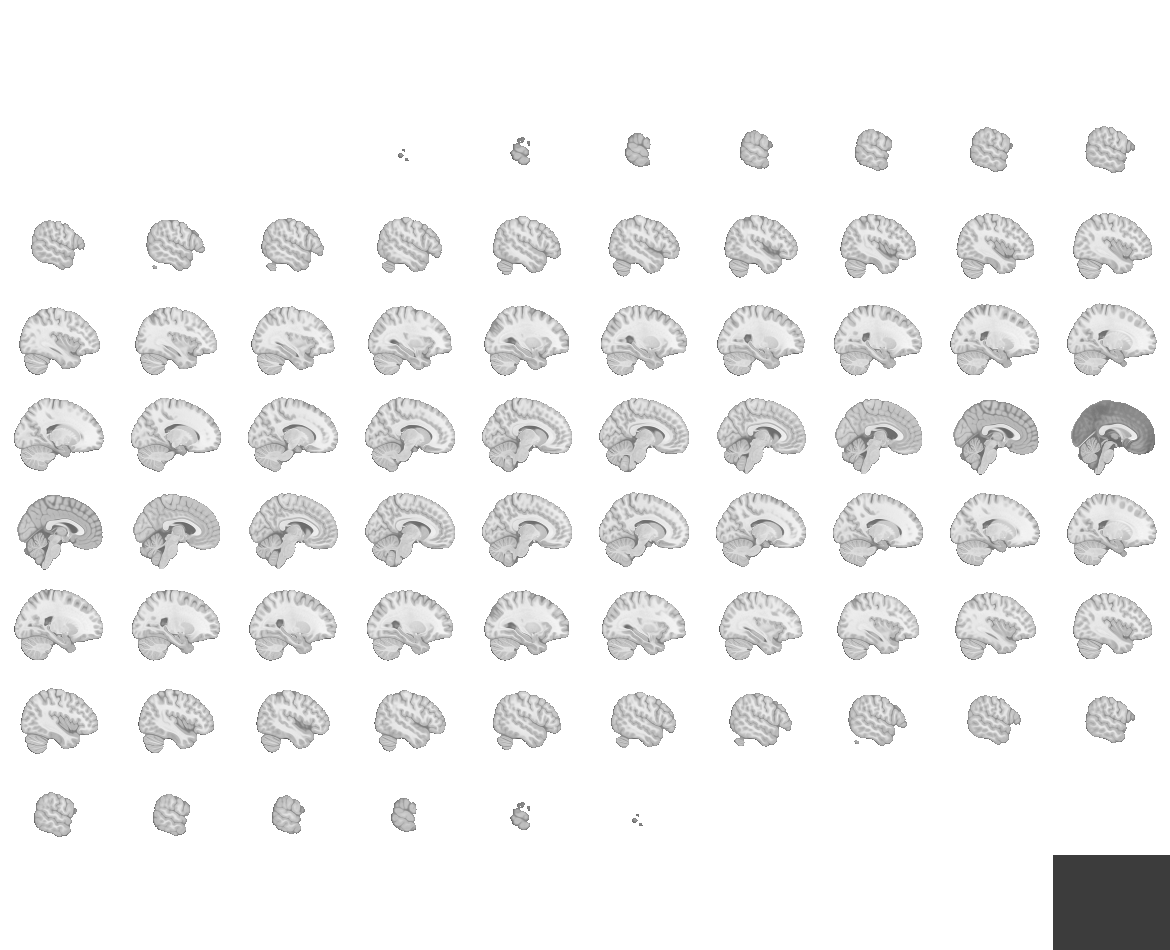
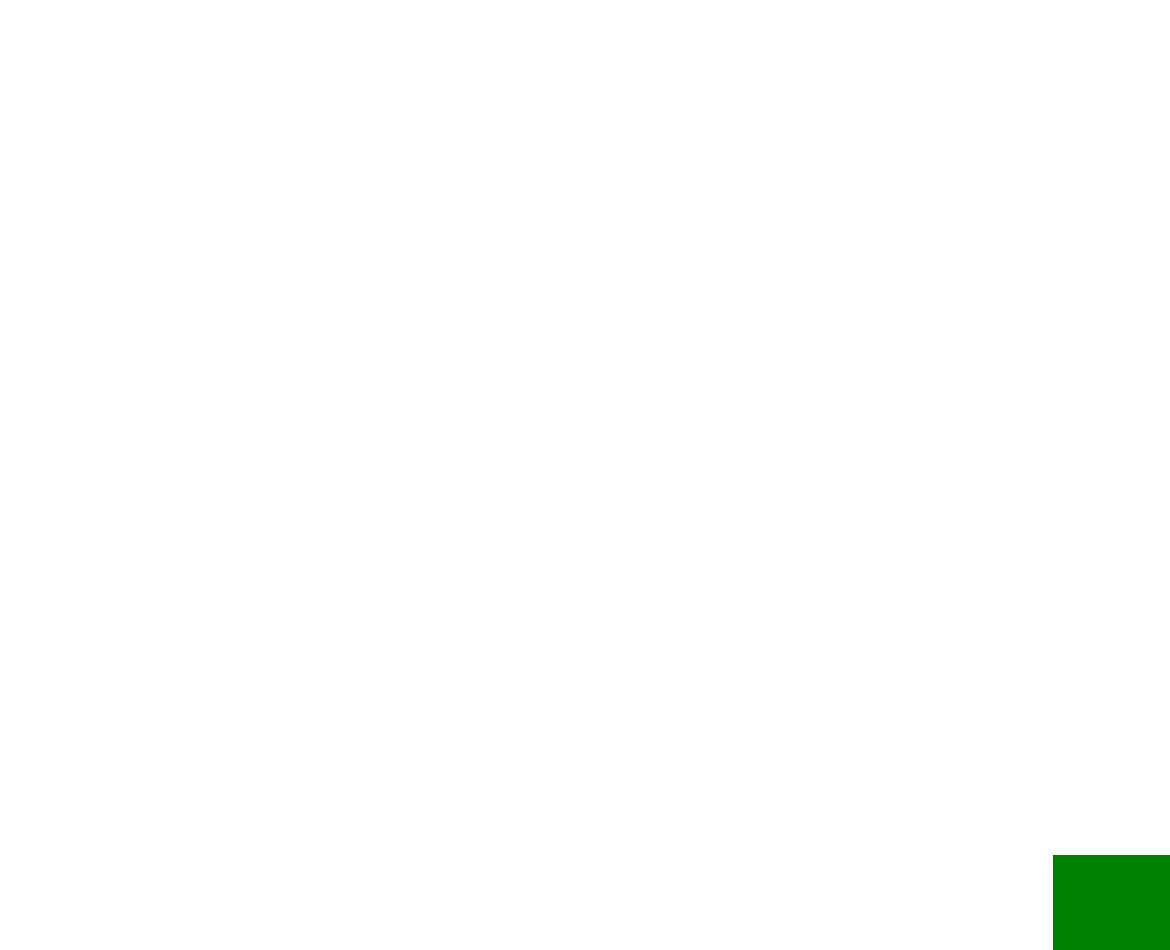

In [27]:
calvin_fwe.corrected_img

Visualize the P-Values (FWE Corrected) Used to Correct the Above


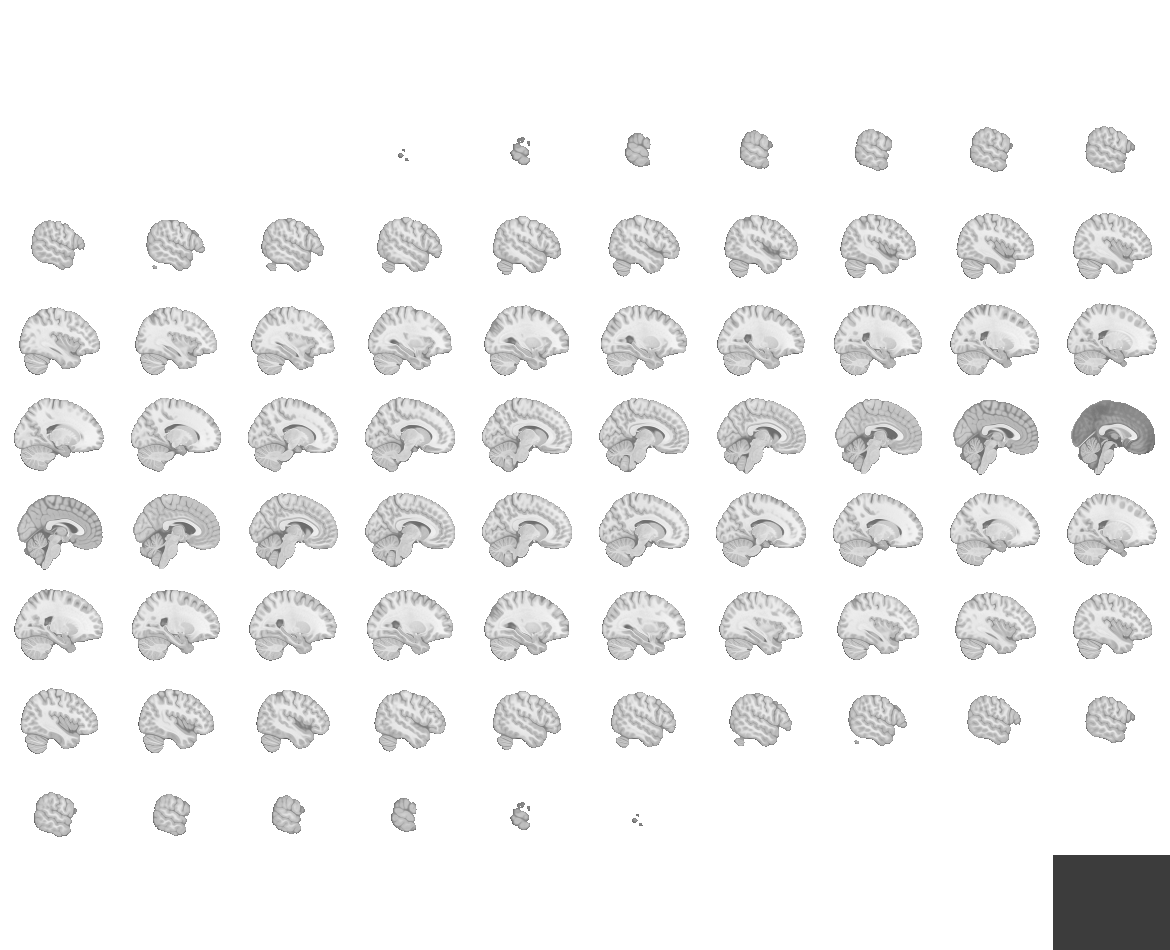
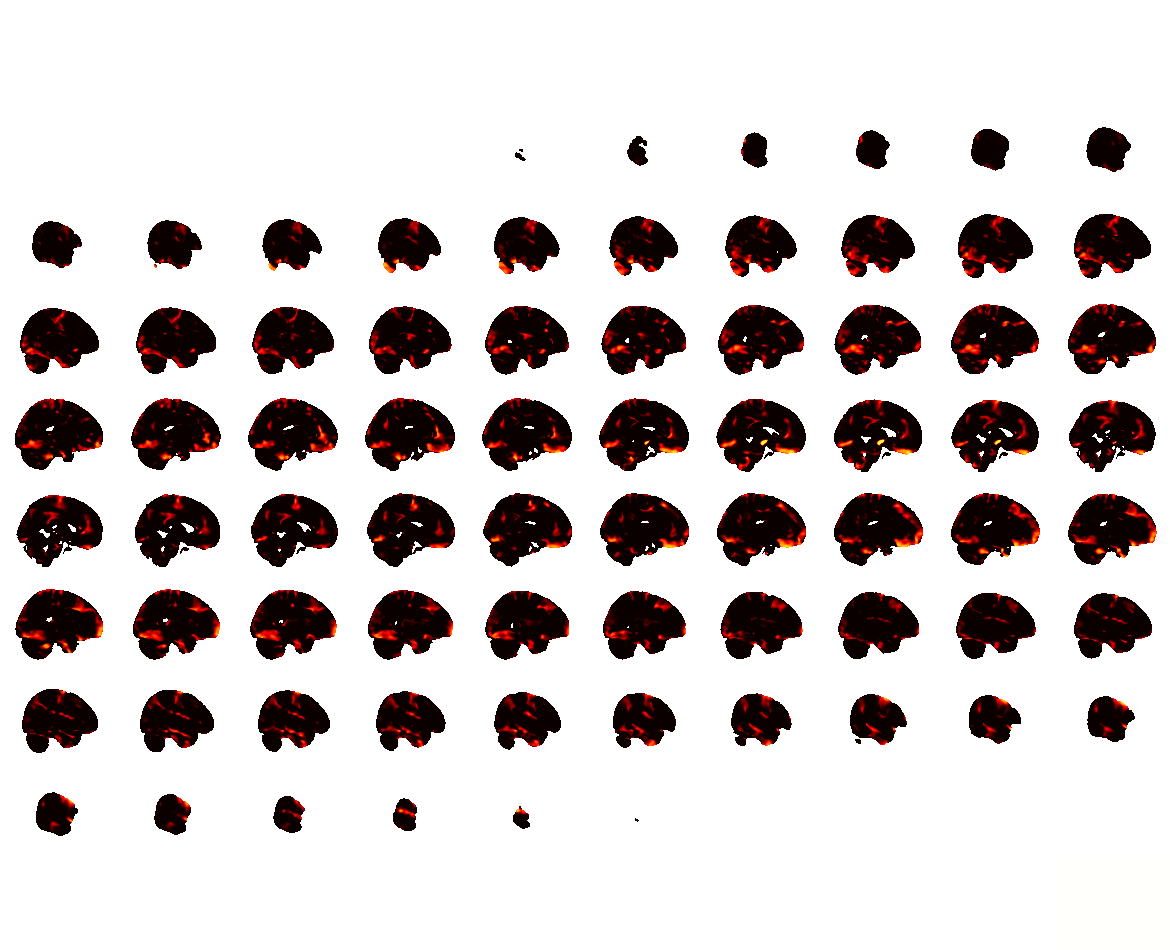

In [28]:
calvin_fwe.p_img

Visualize the Uncorrected Image


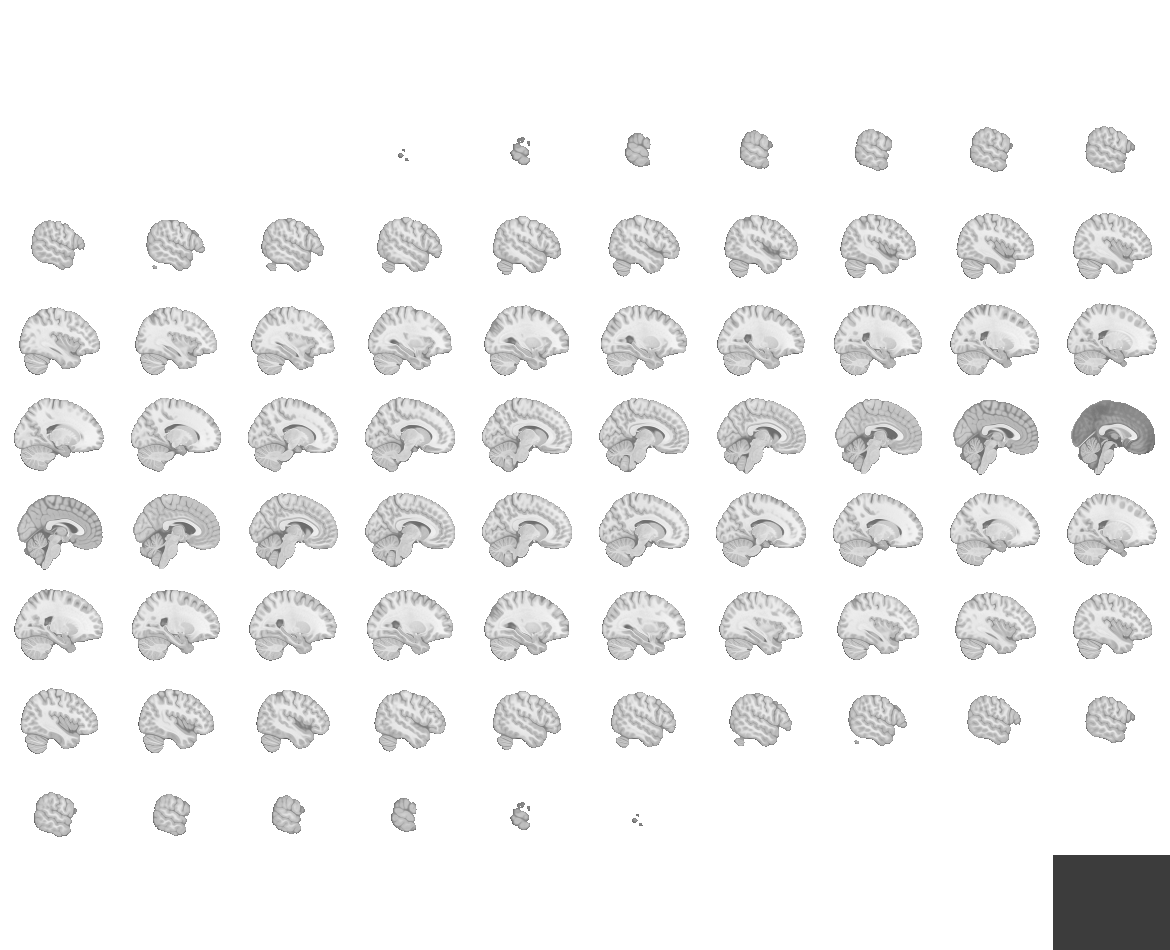
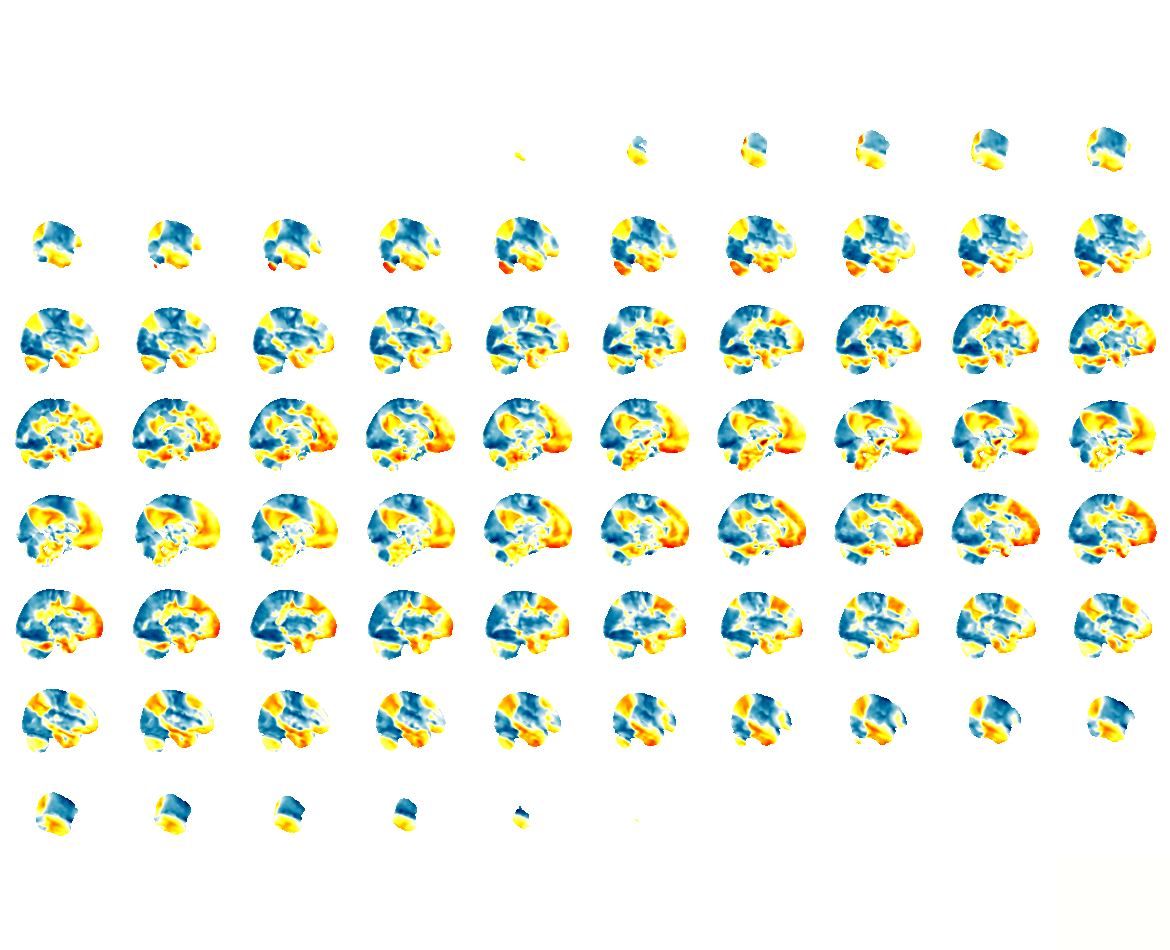

In [29]:
calvin_fwe.uncorrected_img